## Assignment 4 ##

Using data from this FiveThirtyEight post, write code to calculate the correlation of the responses from the poll.
Respond to the story in your PR. Is this a good example of data journalism? Why or why not?

http://fivethirtyeight.com/datalab/opinions-about-the-iran-deal-are-more-about-obama-than-iran/

In [15]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt # package for doing plotting (necessary for adding the line)
import statsmodels.formula.api as smf # package we'll be using for linear regression
import matplotlib
import pandas as pd
import numpy as np
plt.style.use('ggplot')
import dateutil.parser
import math
import random
import matplotlib.ticker as plticker


matplotlib.rcParams['ps.fonttype'] = 42

In [17]:
df = pd.read_excel("iran_obama.xlsx")
df.head()

,Iran_Deal,Approval_for_Obama
Democrats,60,78
Republicans,34,10
Black,54,85
White,45,35
Ind,44,37


In [18]:
lm = smf.ols(formula="Approval_for_Obama~Iran_Deal",data=df).fit() #notice the formula regresses Y on X (Y~X)
lm.params

Intercept   -66.527905
Iran_Deal     2.395023
dtype: float64

In [19]:
intercept, slope = lm.params

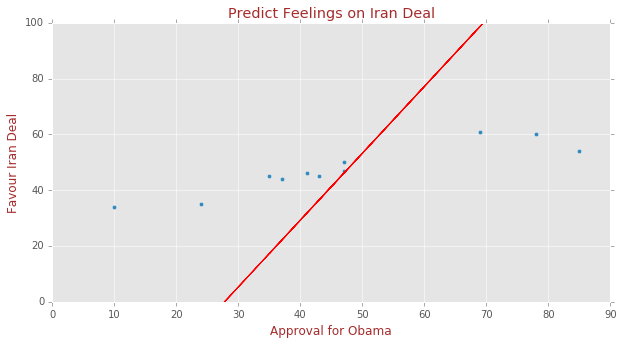

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
df.plot(kind="scatter",x="Approval_for_Obama",y="Iran_Deal", ax=ax)
plt.plot(df["Approval_for_Obama"],slope*df["Approval_for_Obama"]+intercept,"-",color="red")
ax.set_ylim([0, 100])
ax.set_title("Predict Feelings on Iran Deal", color='brown')
ax.set_xlabel('Approval for Obama', color='brown')
ax.set_ylabel('Favour Iran Deal', color='brown')

In [10]:
lm.summary()

c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Approval_for_Obama   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     17.75
Date:                Tue, 26 Jul 2016   Prob (F-statistic):             0.0520
Time:                        15:55:16   Log-Likelihood:                -14.818
No. Observations:                   4   AIC:                             33.64
Df Residuals:                       2   BIC:                             32.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -92.0916     34.903     -2.639      0.119    -242.266      58.083
Iran_Deal      2.9864      0.709      4.213      0.052      -0.064       6.036
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.227
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.557
Skew:                           0.744   Prob(JB):                        0.757
Kurtosis:                       1.938   Cond. No.                         247.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
neg_df = pd.read_excel("negiran_obama.xlsx")
neg_df.head()

,Iran_neg,Approval_for_Obama
Democrats,29,78
Republicans,4,10
Black,37,85
White,11,35
Ind,15,37


In [26]:
neg_lm = smf.ols(formula="Approval_for_Obama~Iran_neg",data=neg_df).fit() #notice the formula regresses Y on X (Y~X)
neg_lm.params

Intercept    4.258741
Iran_neg     2.369464
dtype: float64

In [27]:
intercept, slope = neg_lm.params

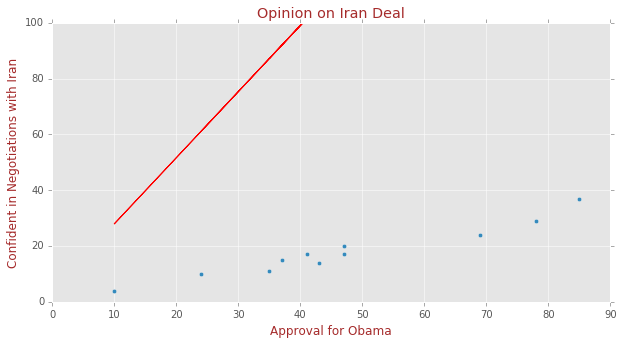

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
neg_df.plot(kind="scatter",x="Approval_for_Obama",y="Iran_neg", ax=ax)
plt.plot(df["Approval_for_Obama"],slope*df["Approval_for_Obama"]+intercept,"-",color="red")
ax.set_ylim([0, 100])
ax.set_title("Opinion on Iran Deal", color='brown')
ax.set_xlabel('Approval for Obama', color='brown')
ax.set_ylabel('Confident in Negotiations with Iran', color='brown')

In [29]:
neg_lm.summary()

c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Approval_for_Obama   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     163.1
Date:                Tue, 26 Jul 2016   Prob (F-statistic):           4.52e-07
Time:                        16:24:35   Log-Likelihood:                -33.125
No. Observations:                  11   AIC:                             70.25
Df Residuals:                       9   BIC:                             71.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2587      3.720      1.145      0.282      -4.156      12.673
Iran_neg       2.3695      0.186     12.772      0.000       1.950       2.789
==============================================================================
Omnibus:                        3.799   Durbin-Watson:                   2.311
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                1.176
Skew:                           0.223   Prob(JB):                        0.556
Kurtosis:                       1.462   Cond. No.                         45.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""